

Name: **LIU,HONGYANG** 17201091/1

### Q3:  

3.   You are required to write code to  create a decision tree (DT) model using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:
    - Importing required libraries
    - Loading Data
    - Feature Selection
    - Splitting Data
    - Building Decision Tree Model
    - Evaluating Model
    - Visualizing Decision Trees


In [415]:
# import required libraries
import requests
import pandas as pd
import time
from sklearn import tree
import matplotlib.pyplot as plt

In [416]:
# loading data
customer=pd.read_csv("customer.csv",header=0,index_col=0)
product=pd.read_csv("product.csv",header=0,index_col=0)
transactions=pd.read_csv("transactions.csv",header=0,index_col=0)

In [417]:
product.head()

,pro_cat_code,pro_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [418]:
product=product.rename(columns={'prod_subcat_code':'pro_subcat_code'})

In [419]:
product

,pro_cat_code,pro_cat,pro_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [420]:
customer.head()

,customer_id,DOB,Gender,City_id,City
0,268408,02-01-1970,M,4.0,Tianjin
1,269696,07-01-1970,F,8.0,Chaohu
2,268159,08-01-1970,F,8.0,Chaohu
3,270181,10-01-1970,F,2.0,Chongqing
4,268073,11-01-1970,M,1.0,Beijing


In [421]:
product.head()

,pro_cat_code,pro_cat,pro_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [422]:
transactions.head()

,transaction_id,customer_id,transaction_date,prod_cat_code,prod_subcat_code,Quantity,Price,Tax,Total_amount,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [423]:
# before we do that, we need merge the data sets 
# first step we will merge Transactions and Customer datasets and drop the duplicated value

df=pd.merge(left = customer, right = transactions, left_on = 'customer_id', right_on = 'customer_id')

In [424]:
len(df)

23053

In [425]:
df_new = pd.merge(df,product,
                  left_on = ('prod_cat_code', "prod_subcat_code"),
                  right_on = ('pro_cat_code', "pro_subcat_code"))

In [404]:
len(df_new)

5959

In [405]:
# remove duplicated value

# df.duplicated(['customer_id','transaction_id']).sum()

In [34]:
# df.drop_duplicates(['customer_id','transaction_id'],inplace = True)

In [35]:
#merge with product datasets
# df=pd.merge(left = df, right = product, left_on = ('prod_cat_code', "prod_subcat_code"), right_on = ('pro_cat_code', "prod_subcat_code"))


In [36]:
len(df)

23053

In [37]:
len(product)

23

In [38]:
len(df_new)

5959

In [84]:
df_new.head()

,customer_id,DOB,Gender,Tran_year,Birth_year,City_id,City,transaction_id,transaction_date,prod_subcat_code,Quantity,Price,Tax,Total_amount,Store_type,pro_cat,prod_subcat,age,age_category
0,268408,1970-02-01,M,2013,1970,4.0,Tianjin,16197868036,2013-12-16,4,-5,-210,110.250,-1160.250,Flagship store,Clothing,Mens,43,1
1,268408,1970-02-01,M,2013,1970,4.0,Tianjin,16197868036,2013-12-12,4,5,210,110.250,1160.250,Flagship store,Clothing,Mens,43,1
2,268159,1970-08-01,F,2013,1970,8.0,Chaohu,86038271893,2013-01-30,4,1,705,74.025,779.025,e-Shop,Clothing,Mens,43,1
3,270829,1970-01-22,F,2012,1970,8.0,Chaohu,22079731721,2012-10-08,4,1,1182,124.110,1306.110,TeleShop,Clothing,Mens,42,1
4,274630,1970-01-02,M,2013,1970,4.0,Tianjin,16857641351,2013-05-12,4,2,269,56.490,594.490,MBR,Clothing,Mens,43,1


In [85]:
df_new=df_new.drop(['pro_cat_code','prod_cat_code','pro_subcat_code'],axis=1)
df_new.head()

KeyError: "['pro_cat_code' 'prod_cat_code' 'pro_subcat_code'] not found in axis"

In [86]:
#calculate age through tran_date and DOB

df_new['transaction_date'] = pd.to_datetime(df_new['transaction_date'], errors='coerce')
df_new.insert(loc=3, column='Tran_year', value= df_new.transaction_date.dt.year)


df_new['DOB'] = pd.to_datetime(df_new['DOB'], errors='coerce')
df_new.insert(loc=4, column='Birth_year', value= df_new.DOB.dt.year)

ValueError: cannot insert Tran_year, already exists

In [87]:
df_new.head()

,customer_id,DOB,Gender,Tran_year,Birth_year,City_id,City,transaction_id,transaction_date,prod_subcat_code,Quantity,Price,Tax,Total_amount,Store_type,pro_cat,prod_subcat,age,age_category
0,268408,1970-02-01,M,2013,1970,4.0,Tianjin,16197868036,2013-12-16,4,-5,-210,110.250,-1160.250,Flagship store,Clothing,Mens,43,1
1,268408,1970-02-01,M,2013,1970,4.0,Tianjin,16197868036,2013-12-12,4,5,210,110.250,1160.250,Flagship store,Clothing,Mens,43,1
2,268159,1970-08-01,F,2013,1970,8.0,Chaohu,86038271893,2013-01-30,4,1,705,74.025,779.025,e-Shop,Clothing,Mens,43,1
3,270829,1970-01-22,F,2012,1970,8.0,Chaohu,22079731721,2012-10-08,4,1,1182,124.110,1306.110,TeleShop,Clothing,Mens,42,1
4,274630,1970-01-02,M,2013,1970,4.0,Tianjin,16857641351,2013-05-12,4,2,269,56.490,594.490,MBR,Clothing,Mens,43,1


In [131]:
df_new['Tran_year']=df_new['Tran_year'].astype(int)
df_new['Birth_year']=df_new['Birth_year'].astype(int)

df_new["age"]=df_new['Tran_year'] -df_new['Birth_year']

df_new = df_new.drop(['Tran_year','Birth_year'],axis=1)

KeyError: 'Tran_year'

In [145]:
df_new.head()

,customer_id,DOB,Gender,City_id,City,transaction_id,transaction_date,prod_subcat_code,Quantity,Price,Tax,Total_amount,Store_type,pro_cat,prod_subcat,age,age_category
0,268408,1970-02-01,M,4.0,Tianjin,16197868036,2013-12-16,4,-5,-210,110.250,-1160.250,Flagship store,Clothing,Mens,43,1
1,268408,1970-02-01,M,4.0,Tianjin,16197868036,2013-12-12,4,5,210,110.250,1160.250,Flagship store,Clothing,Mens,43,1
2,268159,1970-08-01,F,8.0,Chaohu,86038271893,2013-01-30,4,1,705,74.025,779.025,e-Shop,Clothing,Mens,43,1
3,270829,1970-01-22,F,8.0,Chaohu,22079731721,2012-10-08,4,1,1182,124.110,1306.110,TeleShop,Clothing,Mens,42,1
4,274630,1970-01-02,M,4.0,Tianjin,16857641351,2013-05-12,4,2,269,56.490,594.490,MBR,Clothing,Mens,43,1


In [249]:
df_new["age_category"] = df_new["age"]
df_new["age_category"] = df_new["age_category"].apply(lambda x: "young" if x<=25 else "old")

In [268]:
df_new.age_category.value_counts()

old      4427
young    1532
Name: age_category, dtype: int64

In [251]:
df_new.head()

,customer_id,DOB,Gender,City_id,City,transaction_id,transaction_date,prod_subcat_code,Quantity,Price,Tax,Total_amount,Store_type,pro_cat,prod_subcat,age,age_category
0,268408,1970-02-01,M,4.0,Tianjin,16197868036,2013-12-16,4,-5,-210,110.250,-1160.250,Flagship store,Clothing,Mens,43,old
1,268408,1970-02-01,M,4.0,Tianjin,16197868036,2013-12-12,4,5,210,110.250,1160.250,Flagship store,Clothing,Mens,43,old
2,268159,1970-08-01,F,8.0,Chaohu,86038271893,2013-01-30,4,1,705,74.025,779.025,e-Shop,Clothing,Mens,43,old
3,270829,1970-01-22,F,8.0,Chaohu,22079731721,2012-10-08,4,1,1182,124.110,1306.110,TeleShop,Clothing,Mens,42,old
4,274630,1970-01-02,M,4.0,Tianjin,16857641351,2013-05-12,4,2,269,56.490,594.490,MBR,Clothing,Mens,43,old


In [261]:
Y=df_new.age_category


X=df_new.loc[:,["Gender","pro_cat","Store_type","prod_subcat","Total_amount"]]

In [262]:
X= pd.get_dummies(X)
Y= pd.get_dummies(Y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [263]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=4)

decisiontree = decision_tree.fit(X_train,y_train)

y_pred=decisiontree.predict(X_test)

In [264]:
print("performance of train:accuracy:",decisiontree.score(X_train, y_train))

performance of train:accuracy: 0.9903503251520873


In [265]:
print("performance of test:accuracy:",decisiontree.score(X_test, y_test))

performance of test:accuracy: 0.6023489932885906


In [266]:
from sklearn.metrics import accuracy_score


accuracy_score(y_pred,y_test)

0.6023489932885906

In [285]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       880
           1       0.26      0.27      0.26       312

   micro avg       0.60      0.60      0.60      1192
   macro avg       0.50      0.49      0.50      1192
weighted avg       0.61      0.60      0.61      1192
 samples avg       0.60      0.60      0.60      1192



/Users/liuhongyang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.



In [286]:
col_sorted_by_importance=decisiontree.feature_importances_.argsort()


feat_imp=pd.DataFrame({
    'columns':X.columns[col_sorted_by_importance],
    'importance':decisiontree.feature_importances_[col_sorted_by_importance]
})

import plotly_express as px
px.bar(feat_imp, x='columns', y='importance')

In [287]:

from sklearn import tree
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10,random_state=3)
# decisiontree = decision_tree.fit(X_train,y_train)


decisiontree2 = decision_tree.fit(X_test,y_test)


[Text(1519.6980026533017, 531.2454545454545, 'X[5] <= 0.5\nentropy = 0.359\nsamples = 596\nvalue = [[140, 456]\n[456, 140]]'),
 Text(958.6855100235848, 506.53636363636366, 'X[13] <= 0.5\nentropy = 0.318\nsamples = 398\nvalue = [[79, 319]\n[319, 79]]'),
 Text(645.2012087264151, 481.82727272727277, 'X[0] <= 850.298\nentropy = 0.34\nsamples = 309\nvalue = [[67, 242]\n[242, 67]]'),
 Text(280.75471698113205, 457.1181818181818, 'X[0] <= -3515.557\nentropy = 0.404\nsamples = 96\nvalue = [[27, 69]\n[69, 27]]'),
 Text(263.2075471698113, 432.40909090909093, 'entropy = 0.0\nsamples = 11\nvalue = [[0, 11]\n[11, 0]]'),
 Text(298.3018867924528, 432.40909090909093, 'X[10] <= 0.5\nentropy = 0.433\nsamples = 85\nvalue = [[27, 58]\n[58, 27]]'),
 Text(149.1509433962264, 407.70000000000005, 'X[0] <= -2146.462\nentropy = 0.355\nsamples = 52\nvalue = [[12, 40]\n[40, 12]]'),
 Text(52.641509433962256, 382.9909090909091, 'X[11] <= 0.5\nentropy = 0.48\nsamples = 5\nvalue = [[3, 2]\n[2, 3]]'),
 Text(35.094339622

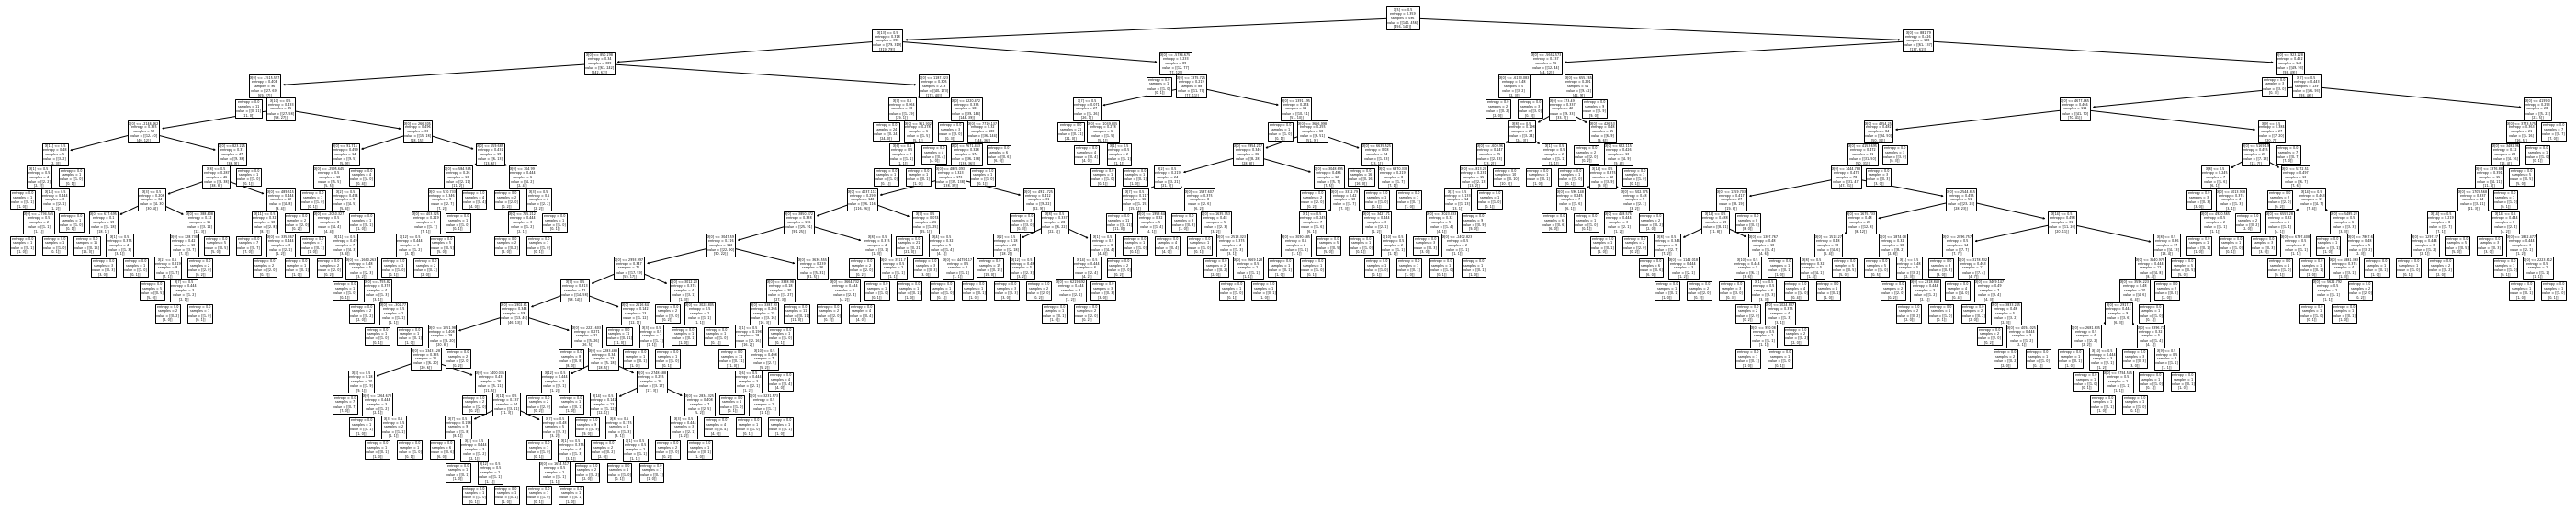

In [288]:
plt.figure(figsize=(50,10))
tree.plot_tree(decisiontree2)

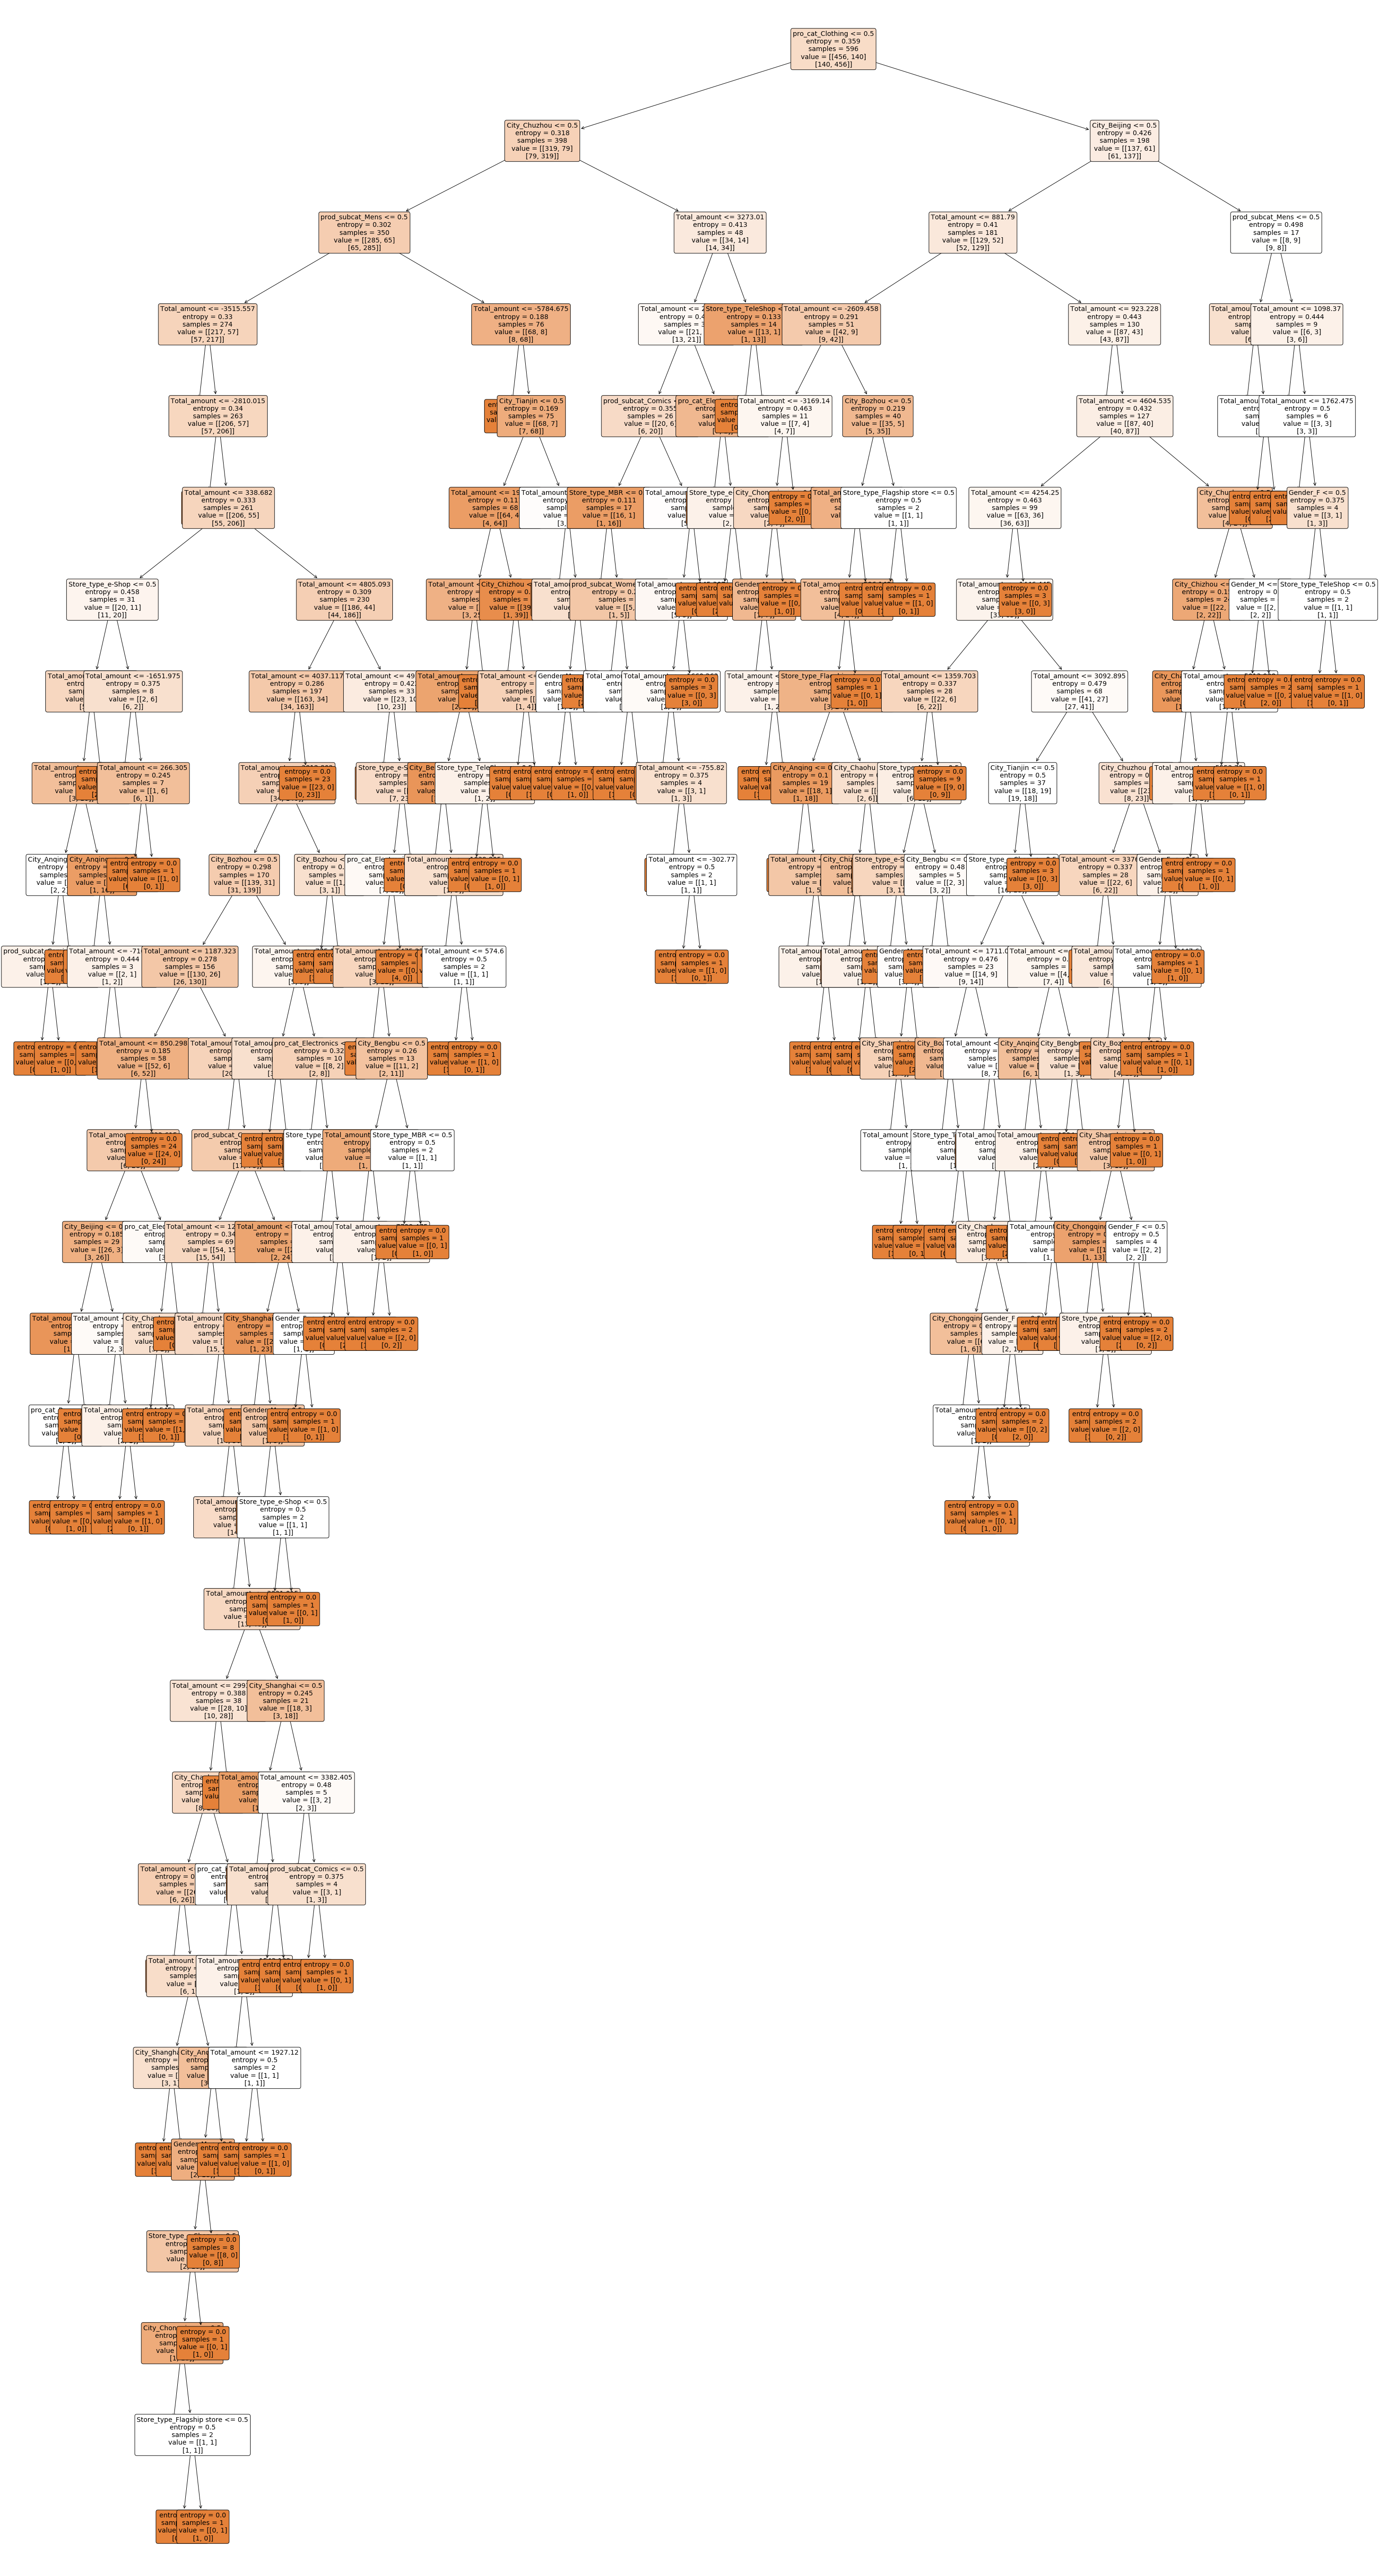

In [188]:
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier() #max_depth is maximum number of levels in the tree
clf.fit(X_test,y_test)

plt.figure(figsize=(50,100))
a = plot_tree(clf, 
              feature_names=X.columns, 
              class_names=Y.columns, 
              filled=True, 
              rounded=True, 
              fontsize=14)

4. You are required to write code to  find frequent itemsets using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:
    - Importing required libraries
    - Creating a list from dataset (Question 1)
    - Convert list to dataframe with boolean values
    - Find frequently occurring itemsets using Apriori Algorithm
    - Find frequently occurring itemsets using F-P Growth
    - Mine the Association Rules

In [426]:
# importing required libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
%matplotlib inline

In [427]:
df.head()

,customer_id,DOB,Gender,City_id,City,transaction_id,transaction_date,prod_cat_code,prod_subcat_code,Quantity,Price,Tax,Total_amount,Store_type
0,268408,02-01-1970,M,4.0,Tianjin,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,Tianjin,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,Tianjin,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,Tianjin,28810141075,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,Tianjin,64633435931,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


In [428]:
df=df.drop_duplicates(['customer_id','Store_type'],keep='first')

In [429]:
relationship=(df.groupby(['customer_id','Store_type']).
              size().unstack().reset_index().fillna(0).set_index('customer_id')) #unstack()数据行转列
relationship.iloc[0:10,:]

Store_type,Flagship store,MBR,TeleShop,e-Shop
customer_id,,,,
266783,0.0,0.0,1.0,1.0
266784,1.0,0.0,1.0,1.0
266785,1.0,0.0,1.0,1.0
266788,1.0,1.0,0.0,1.0
266794,1.0,1.0,1.0,1.0
266799,1.0,0.0,0.0,1.0
266803,0.0,0.0,0.0,1.0
266804,0.0,0.0,0.0,1.0
266805,0.0,0.0,0.0,1.0


In [430]:
frequent=apriori(relationship,min_support=0.05,use_colnames=True)

# the datasets with the 10 highest support meritcs
frequent.sort_values(by='support',ascending=False).head(10)

,support,itemsets
3,0.792953,(e-Shop)
1,0.544860,(MBR)
0,0.534145,(Flagship store)
2,0.528878,(TeleShop)
8,0.424446,"(MBR, e-Shop)"
9,0.408645,"(e-Shop, TeleShop)"
6,0.407374,"(Flagship store, e-Shop)"
7,0.286233,"(MBR, TeleShop)"
4,0.283509,"(MBR, Flagship store)"
5,0.271704,"(Flagship store, TeleShop)"


In [433]:
rules=association_rules(frequent,metric='lift',min_threshold=0.8)
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,"(e-Shop, TeleShop)",(MBR),0.408645,0.544860,0.223938,0.548000,1.005763,0.001283,1.006947
33,(MBR),"(e-Shop, TeleShop)",0.544860,0.408645,0.223938,0.411000,1.005763,0.001283,1.003998
39,"(Flagship store, e-Shop, TeleShop)",(MBR),0.206320,0.544860,0.112241,0.544014,0.998447,-0.000175,0.998145
46,(MBR),"(Flagship store, e-Shop, TeleShop)",0.544860,0.206320,0.112241,0.206000,0.998447,-0.000175,0.999597
35,(TeleShop),"(MBR, e-Shop)",0.528878,0.424446,0.223938,0.423420,0.997583,-0.000542,0.998221
30,"(MBR, e-Shop)",(TeleShop),0.424446,0.528878,0.223938,0.527599,0.997583,-0.000542,0.997294
6,(MBR),(TeleShop),0.544860,0.528878,0.286233,0.525333,0.993299,-0.001931,0.992533
7,(TeleShop),(MBR),0.528878,0.544860,0.286233,0.541209,0.993299,-0.001931,0.992041
34,(e-Shop),"(MBR, TeleShop)",0.792953,0.286233,0.223938,0.282410,0.986641,-0.003032,0.994672
31,"(MBR, TeleShop)",(e-Shop),0.286233,0.792953,0.223938,0.782360,0.986641,-0.003032,0.951329


In [434]:
data=DataFrame(rules)
R_result=data[(data['lift']>=1)&(data['confidence']>=0.05)&(data['antecedents']!=frozenset({'CD'}))&(data['consequents']!=frozenset({'CD'}))]
R_result.sort_values(by=['lift'],axis=0,ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,"(e-Shop, TeleShop)",(MBR),0.408645,0.544860,0.223938,0.548,1.005763,0.001283,1.006947
33,(MBR),"(e-Shop, TeleShop)",0.544860,0.408645,0.223938,0.411,1.005763,0.001283,1.003998


In [435]:
len(df)

13219

In [439]:
FP_frequent_itemsets = pyfpgrowth.find_frequent_patterns(transactions, 2)

NameError: name 'pyfpgrowth' is not defined

In [437]:
R_result.head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,"(e-Shop, TeleShop)",(MBR),0.408645,0.544860,0.223938,0.548,1.005763,0.001283,1.006947
33,(MBR),"(e-Shop, TeleShop)",0.544860,0.408645,0.223938,0.411,1.005763,0.001283,1.003998


In [304]:
df.groupby("customer_id").mean().Total_amount

customer_id
266783     622.778000
266784    1898.021667
266785    2701.725000
266788    1523.242500
266794    2331.826250
266799    1899.495000
266803    3984.630000
266804    1588.990000
266805    4623.320000
266806    3371.539167
266807    1454.180000
266809    2999.191000
266810    3969.381000
266812     628.192500
266813    1037.595000
266814    2433.431000
266815    2533.028333
266816    1839.640833
266817    1034.280000
266818    1046.214000
266819    2478.146667
266820    2023.807500
266821     727.826667
266822    2151.877000
266823    2994.550000
266824    1517.717500
266825     367.412500
266827    2088.450000
266829    3057.166667
266830    4354.436667
             ...     
275222    2314.975000
275224    1532.792857
275225    2152.816250
275226    3286.712000
275227    1319.646250
275228     674.602500
275229     431.834000
275230    1492.026250
275231    2905.045000
275232    5469.750000
275233    2977.091000
275236    4679.122500
275237       0.000000
275241    3702.48666

In [ ]:
df.info()